<a href="https://colab.research.google.com/github/CyberJuan55/GenderPredict/blob/master/RedNeuronal3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, label_binarize
from sklearn.preprocessing import StandardScaler, RobustScaler, Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import stats
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn.compose import make_column_transformer



urlTrain  = 'https://raw.githubusercontent.com/CyberJuan55/GenderPredict/master/Dataset/SpotifyFeatures.csv_train.csv'
urlFull = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/SpotifyFeatures.csv'
urlNuevoDataSet = 'https://github.com/CyberJuan55/GenderPredict/blob/master/Dataset/genres_v2.csv'



df_train_original = pd.read_csv(urlTrain)

df_train = df_train_original.copy()

In [ ]:
df_train['loudness'].min()

-52.457

In [4]:
# Funcion para el preprocesamiento de datos
def preprocesado(df,out=False):



    indexPOP = df[df.popularity==0].index
    df.drop(indexPOP , inplace=True)

    indexACO = df[df.acousticness < 0.02] .index
    df.drop(indexACO , inplace=True)
    indexACO1 = df[df.acousticness > 0.98] .index
    df.drop(indexACO1 , inplace=True)

    indexVAL = df[df.valence < 0.08] .index
    df.drop(indexVAL , inplace=True)
    indexVAL1 = df[df.valence > 0.95] .index
    df.drop(indexVAL1 , inplace=True)

    indexDur = df[df.duration_ms > 500000] .index
    df.drop(indexDur , inplace=True)

    indexLOU = df[df.duration_ms < -30.00] .index
    df.drop(indexLOU , inplace=True)    
    








    df.drop_duplicates()
    df.dropna(axis=0, inplace=True)


    df = df.loc[:,['genre','popularity','acousticness','danceability','duration_ms','energy','liveness','loudness',
       'speechiness', 'tempo','valence']] 

    df['genre']= df['genre'].replace(["Children’s Music"],"Children's Music")

    #indexNamesChildren = df[ df['genre'] == "Children's Music" ].index
    #df.drop(indexNamesChildren , inplace=True)

    indexNamesAcapella = df[ df['genre'] == "A Capella"].index
    df.drop(indexNamesAcapella , inplace=True)

    y = df['genre'] 

#-------------------------------------------------------------------------------

    

    if out == True:
        labelencoder = LabelEncoder()
        df["genre"] = labelencoder.fit_transform(df["genre"])

        df_train_genres = df
        generos=list(df_train['genre'].unique())

        b = []
        for i in generos:
            df=df_train_genres[df_train_genres["genre"]==i].drop(columns=["genre","mode","key"])
     
            z = np.abs(stats.zscore(df))
            a=np.where(z > 3)
            outliers=list(set(list(a[0])))
            ñ = [df.iloc[x,:].name for x in outliers]
            b = ñ + b
        df_train_genres.drop(b, axis = 0, inplace = True)

        df = df_train_genres
#-------------------------------------------------------------------------------
      
    X = df.drop(columns=['genre'])
#-------------------------------------------------------------------------------   
    return X,y

In [5]:
df_train,y = preprocesado(df_train,out=False)

In [6]:
lb = LabelEncoder()

In [7]:
y = lb.fit_transform(y)

In [8]:
from tensorflow.keras.utils import to_categorical

In [9]:
y = to_categorical(y)

In [10]:
features_num=list(df_train)
preprocessor_X = make_column_transformer(
    (StandardScaler(), features_num),
)


In [11]:
df_train = preprocessor_X.fit_transform(df_train)

In [13]:
nor = Normalizer()

In [14]:
df_train_nor = nor.fit_transform(df_train)

In [15]:
df_train.hist(bins=500, figsize=(25,15))

AttributeError: ignored

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
X_train_full, X_valid_full, y_train_full, y_valid_full = train_test_split(df_train, y, 
                                                                train_size=0.7, test_size=0.3,
                                                                random_state=42)

In [ ]:
y_train_full.unique()

array(['Alternative', 'Reggaeton', 'Jazz', 'R&B', 'Soundtrack', 'Hip-Hop', 'Folk', 'Blues', 'Anime', 'Movie', "Children's Music", 'Electronic', 'Reggae', 'Comedy', 'Opera', 'World', 'Country',
       'Dance', 'Rap', 'Indie', 'Soul', 'Ska', 'Pop', 'Rock', 'Classical'], dtype=object)

In [19]:
features_num=list(df_train)
preprocessor_X = make_column_transformer(
    (StandardScaler(), features_num),
)


In [19]:
features_cat = 'genre'
preprocessor_y = make_column_transformer(
    (OneHotEncoder(), features_cat),
)

In [20]:
X_train = preprocessor_X.fit_transform(X_train_full)
X_valid = preprocessor_X.transform(X_valid_full)


In [21]:
nor = Normalizer()

In [22]:
x_train_nor = nor.fit_transform(X_train)

In [23]:
X_valid_nor = nor.fit_transform(X_valid)

In [ ]:
y_train_df = pd.DataFrame(y_train_full)
y_valid_df = pd.DataFrame(y_valid_full)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
yTrain = to_categorical(y_train_full)
yValid = to_categorical(y_valid_full)

In [18]:
input_shape = [X_train_full.shape[1]]

In [19]:
input_shape

[10]

In [20]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(56, activation='sigmoid'),
    layers.Dropout(0.2),

    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.2),


    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),

    layers.BatchNormalization(),
    layers.Dense(25,activation='softmax')
])

Minimum Validation Loss: 1.8212


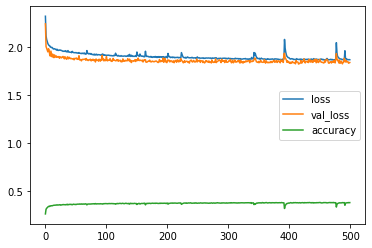

In [21]:
model.compile(
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics = ['accuracy'],
    
)
history = model.fit(
    X_train_full, y_train_full,
    validation_data=(X_valid_full, y_valid_full),
    batch_size=512,
    epochs=500,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss','accuracy']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))

In [ ]:
history_df

,loss,accuracy,val_loss,val_accuracy
0,2.5,0.2,2.7,0.2
1,2.2,0.3,2.1,0.3
2,2.1,0.3,2.0,0.4
3,2.1,0.3,2.0,0.4
4,2.1,0.3,2.0,0.4
...,...,...,...,...
195,1.9,0.4,1.9,0.4
196,1.9,0.4,1.9,0.4
197,1.9,0.4,1.9,0.4
198,1.9,0.4,1.9,0.4
